<a href="https://colab.research.google.com/github/ARCHITHAOJHA/Explainable-AI/blob/main/2303A52170_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARCHITHA OJHA

2303A52170 - 41



 Q1 Skill Boost – Coding Bootcamp

Intercept (β₀): 6.714285714285715
Coefficient (β₁): 9.357142857142854
Baseline: 14.2
   Webinars_Attended  Sign_ups  Predicted  SHAP_Value  Baseline_plus_SHAP  \
0                  0         5   6.714286   -7.485714            6.714286   
1                  1        15  16.071429    1.871429           16.071429   
2                  2        25  25.428571   11.228571           25.428571   
3                  0         8   6.714286   -7.485714            6.714286   
4                  1        18  16.071429    1.871429           16.071429   

   Prediction_Error Over/Under  
0          1.714286       Over  
1          1.071429       Over  
2          0.428571       Over  
3         -1.285714      Under  
4         -1.928571      Under  


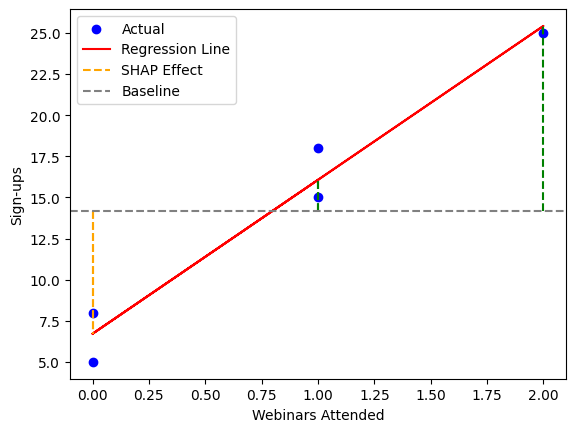

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Dataset
data = pd.DataFrame({
    'Webinars_Attended': [0, 1, 2, 0, 1],
    'Sign_ups': [5, 15, 25, 8, 18]
})

# Independent (X) and Dependent (y) variables
X = data[['Webinars_Attended']]
y = data['Sign_ups']

# Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
intercept = model.intercept_
coef = model.coef_[0]

# Baseline value (mean of y)
baseline = y.mean()

# Predictions
data['Predicted'] = model.predict(X)

# SHAP values = Predicted - Baseline
data['SHAP_Value'] = data['Predicted'] - baseline

# Final Prediction check: Baseline + SHAP
data['Baseline_plus_SHAP'] = baseline + data['SHAP_Value']

# Over/Under prediction
data['Prediction_Error'] = data['Predicted'] - data['Sign_ups']
data['Over/Under'] = data['Prediction_Error'].apply(lambda x: 'Over' if x > 0 else ('Under' if x < 0 else 'Exact'))

# Print results
print("Intercept (β₀):", intercept)
print("Coefficient (β₁):", coef)
print("Baseline:", baseline)
print(data)

# Plot regression line
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, data['Predicted'], color='red', label='Regression Line')
for i in range(len(data)):
    plt.vlines(X.iloc[i], baseline, data['Predicted'].iloc[i],
               colors='green' if data['SHAP_Value'].iloc[i] > 0 else 'orange',
               linestyles='dashed', label='SHAP Effect' if i == 0 else "")
plt.axhline(baseline, color='gray', linestyle='--', label='Baseline')
plt.xlabel('Webinars Attended')
plt.ylabel('Sign-ups')
plt.legend()
plt.show()


Q2 FinTrack – Investment Signup Prediction using Multiple Linear
Regression and SHAP Analysis

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Dataset
data = pd.DataFrame({
    'Webinars': [3, 2, 1, 4, 2],
    'Blogs': [5, 3, 4, 2, 1],
    'Signups': [60, 45, 40, 55, 35]
})

# Independent and dependent variables
X = data[['Webinars', 'Blogs']]
y = data['Signups']

# Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
intercept = model.intercept_
coef_webinars, coef_blogs = model.coef_

# Baseline value (mean of y)
baseline = y.mean()

# Predictions
data['Predicted'] = model.predict(X)

# SHAP values calculation
# Contribution from Webinars
data['SHAP_Webinars'] = coef_webinars * (data['Webinars'] - X['Webinars'].mean())
# Contribution from Blogs
data['SHAP_Blogs'] = coef_blogs * (data['Blogs'] - X['Blogs'].mean())

# Verify Prediction = Baseline + SHAP(Webinars) + SHAP(Blogs)
data['Baseline_plus_SHAPs'] = baseline + data['SHAP_Webinars'] + data['SHAP_Blogs']

# Over/Under prediction
data['Prediction_Error'] = data['Predicted'] - data['Signups']
data['Over/Under'] = data['Prediction_Error'].apply(lambda x: 'Over' if x > 0 else ('Under' if x < 0 else 'Exact'))

# Print results
print("Intercept (β₀):", intercept)
print("Coefficient for Webinars (β₁):", coef_webinars)
print("Coefficient for Blogs (β₂):", coef_blogs)
print("Baseline:", baseline)
print(data)


Intercept (β₀): 15.58823529411766
Coefficient for Webinars (β₁): 7.745098039215684
Coefficient for Blogs (β₂): 4.274509803921567
Baseline: 47.0
   Webinars  Blogs  Signups  Predicted  SHAP_Webinars  SHAP_Blogs  \
0         3      5       60  60.196078       4.647059     8.54902   
1         2      3       45  43.901961      -3.098039     0.00000   
2         1      4       40  40.431373     -10.843137     4.27451   
3         4      2       55  55.117647      12.392157    -4.27451   
4         2      1       35  35.352941      -3.098039    -8.54902   

   Baseline_plus_SHAPs  Prediction_Error Over/Under  
0            60.196078          0.196078       Over  
1            43.901961         -1.098039      Under  
2            40.431373          0.431373       Over  
3            55.117647          0.117647       Over  
4            35.352941          0.352941       Over  


Q3 Regression with Diabetes Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Load Diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='DiseaseProgression')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_
feature_names = X.columns

# 3. Calculate Baseline Value (mean of training target)
baseline = y_train.mean()

# 4. Predictions for test data
y_pred = model.predict(X_test)

# 5. SHAP value calculation (manual, proportional attribution)
# SHAP(feature) = coefficient * (feature_value - mean_feature_train)
X_train_mean = X_train.mean()
shap_values = pd.DataFrame(index=X_test.index, columns=feature_names)

for feature, coef in zip(feature_names, coefficients):
    shap_values[feature] = coef * (X_test[feature] - X_train_mean[feature])

# Verify Prediction = Baseline + sum(SHAP values)
shap_values['Sum_SHAP'] = shap_values.sum(axis=1)
shap_values['Baseline_plus_SHAP'] = baseline + shap_values['Sum_SHAP']

# 6. Combine results
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Baseline': baseline,
    'Sum_SHAP': shap_values['Sum_SHAP'],
    'Baseline_plus_SHAP': shap_values['Baseline_plus_SHAP']
})
results['Error'] = results['Predicted'] - results['Actual']
results['Over/Under'] = results['Error'].apply(lambda x: 'Over' if x > 0 else ('Under' if x < 0 else 'Exact'))

# Output
print("Intercept (β₀):", intercept)
print("Baseline:", baseline)
print("Coefficients:", dict(zip(feature_names, coefficients)))
print("\nSHAP values (first 5 rows):")
print(shap_values.head())
print("\nResults (first 5 rows):")
print(results.head())


Intercept (β₀): 151.34560453985995
Baseline: 153.73654390934846
Coefficients: {'age': np.float64(37.904021350074984), 'sex': np.float64(-241.96436231273995), 'bmi': np.float64(542.4287585162899), 'bp': np.float64(347.70384391385636), 's1': np.float64(-931.4888458835163), 's2': np.float64(518.0622769833376), 's3': np.float64(163.41998299131035), 's4': np.float64(275.3179015786484), 's5': np.float64(736.1988589046839), 's6': np.float64(48.67065743196543)}

SHAP values (first 5 rows):
          age        sex        bmi         bp          s1         s2  \
287  1.663955  10.846180  -4.307759  -5.972983 -116.970979  65.277976   
211  3.453897  10.846180  19.077692   7.195035   22.732658  -8.212397   
72   2.352394 -12.218287  -3.138486  -4.775890  -96.464023  25.693757   
321  3.591585  10.846180  27.262599  27.150567  -51.605057  19.366772   
73   0.424765 -12.218287 -11.908030  -1.184613  -36.224840  27.964983   

            s3         s4         s5        s6    Sum_SHAP  Baseline_plus_

Q4 Regression with Student Performance Dataset

Intercept: 7.937888198757747
Coefficients: {'study_time': np.float64(7.968944099378877), 'parental_education': np.float64(3.645962732919255), 'absences': np.float64(2.9192546583850936), 'failures': np.float64(-7.5776397515527965), 'health': np.float64(6.397515527950316)}
Baseline (mean training final score): 71.14285714285714

SHAP values (first 5 rows):
   study_time  parental_education   absences  failures    health   Sum_SHAP  \
8   12.522626            2.604259 -14.596273   7.57764  3.655723  11.763975   
1    4.553682            2.604259 -11.677019   7.57764 -2.741792   0.316770   
5    4.553682            2.604259  -8.757764  -0.00000  3.655723   2.055901   

   Baseline_plus_SHAP  
8           82.906832  
1           71.459627  
5           73.198758  

Results (first 5 rows):
   Actual  Predicted   Baseline   Sum_SHAP  Baseline_plus_SHAP      Error  \
8      92  82.906832  71.142857  11.763975           82.906832  -9.093168   
1      85  71.459627  71.142857   0.316770         

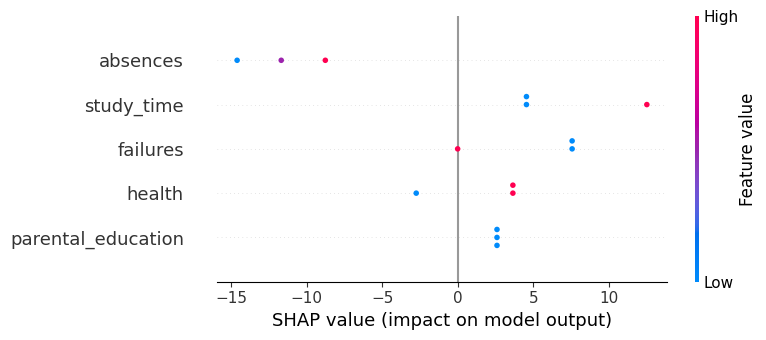

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap

# Example dataset: Simulated student attributes
data = pd.DataFrame({
    'study_time': [2, 3, 1, 4, 2, 3, 5, 1, 4, 2],
    'parental_education': [3, 4, 2, 5, 3, 4, 5, 2, 4, 3],
    'absences': [5, 2, 10, 1, 6, 3, 0, 12, 1, 8],
    'failures': [0, 0, 1, 0, 2, 1, 0, 3, 0, 1],
    'health': [4, 3, 2, 5, 3, 4, 5, 2, 4, 3],
    'final_score': [75, 85, 60, 95, 55, 80, 98, 50, 92, 65]
})

# Independent and dependent variables
X = data.drop(columns=['final_score'])
y = data['final_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Baseline (mean final score from training data)
baseline = y_train.mean()

# Predictions
y_pred = model.predict(X_test)

# SHAP value calculation
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X.columns, index=X_test.index)
shap_df['Sum_SHAP'] = shap_df.sum(axis=1)
shap_df['Baseline_plus_SHAP'] = baseline + shap_df['Sum_SHAP']

# Combine results
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Baseline': baseline,
    'Sum_SHAP': shap_df['Sum_SHAP'],
    'Baseline_plus_SHAP': shap_df['Baseline_plus_SHAP']
})
results['Error'] = results['Predicted'] - results['Actual']
results['Over/Under'] = results['Error'].apply(lambda x: 'Over' if x > 0 else ('Under' if x < 0 else 'Exact'))

# Output
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))
print("Baseline (mean training final score):", baseline)
print("\nSHAP values (first 5 rows):")
print(shap_df.head())
print("\nResults (first 5 rows):")
print(results.head())

# Optional: Plot SHAP summary
shap.summary_plot(shap_values, X_test)
